# Building a Neural Network to predict whether a customer will make a purchase

In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Generating synthetic data
np.random.seed(0)
data_size = 200

# Two features: visit duration and pages visited
features = np.random.rand(data_size, 2)
# Purchase (1) or not (0)
labels = (features[:, 0] + features[:, 1] > 1).astype(int)

In [3]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=["VisitDuration", "PagesVisited"])
df["Purchase"] = labels

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df[["VisitDuration", "PagesVisited"]],
    df["Purchase"],
    test_size=0.2,
    random_state=42,
)

In [5]:
# Define the model
model = Sequential(
    [
        # Input layer with 2 features
        Dense(10, activation="relu", input_shape=(2,)),
        # Output layer with sigmoid activation for binary classification
        Dense(1, activation="sigmoid"),
    ]
)

In [6]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [7]:
# Train the model and save the history
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=10,
    validation_split=0.2,
)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5026 - loss: 0.7061 - val_accuracy: 0.5625 - val_loss: 0.6996
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5202 - loss: 0.6946 - val_accuracy: 0.5938 - val_loss: 0.6956
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5137 - loss: 0.6994 - val_accuracy: 0.5938 - val_loss: 0.6913
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4763 - loss: 0.7013 - val_accuracy: 0.6250 - val_loss: 0.6877
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5030 - loss: 0.6978 - val_accuracy: 0.6562 - val_loss: 0.6834
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5690 - loss: 0.6913 - val_accuracy: 0.6562 - val_loss: 0.6799
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5275 - loss: 0.6913 - val_accuracy: 0.6875 - val_loss: 0.6768
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6473 - loss: 0.6830 - val_accuracy: 0.7188 - v

In [8]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9729 - loss: 0.1969
Test Accuracy: 0.9750000238418579


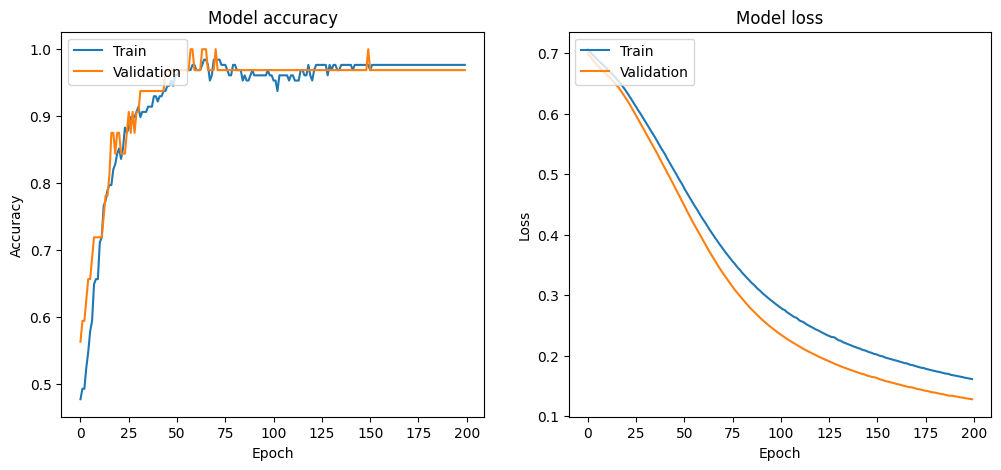

In [9]:
# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.show()

### Decision Boundary


In [10]:
#  Generate a grid over the feature space
x_min, x_max = df["VisitDuration"].min() - 0.1, df["VisitDuration"].max() + 0.1
y_min, y_max = df["PagesVisited"].min() - 0.1, df["PagesVisited"].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

In [11]:
# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


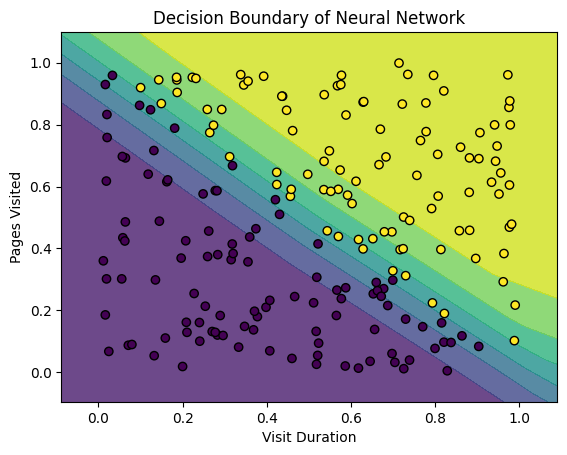

In [12]:
# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df["VisitDuration"], df["PagesVisited"], c=df["Purchase"], edgecolor="k")
plt.xlabel("Visit Duration")
plt.ylabel("Pages Visited")
plt.title("Decision Boundary of Neural Network")
plt.show()